# PCA get optimal n components

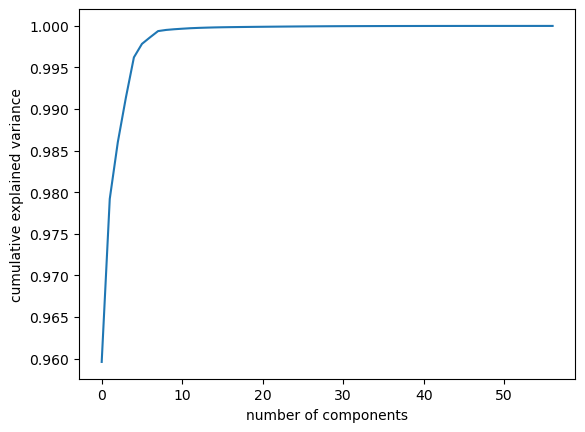

Number of components: 4


In [29]:
# pca try
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Load the dataset
df= pd.read_csv('clean_2014.csv',index_col=0)

# Split the data into features and target
X = df.drop(['accident_severity_encoding','accident_index'], axis=1)

pca = PCA()
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
# Create a PCA model with n_components equal to 0.99
pca = PCA(n_components=0.99)
pca.fit(X)
# Print the corresponding number of components
print("Number of components:", pca.n_components_)

# naive bayes

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


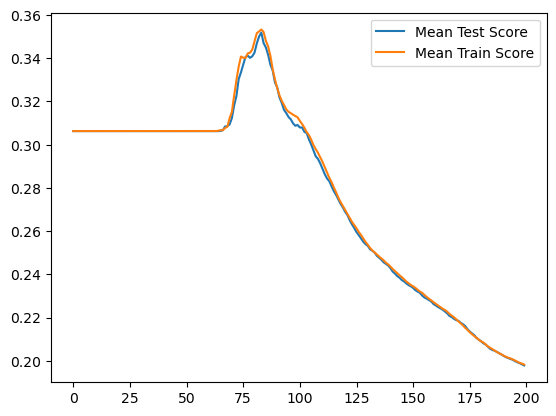

GaussianNB(var_smoothing=9.884959046625586e-06)
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     23986
           1       0.22      0.10      0.14      3955
           2       0.04      0.25      0.07       309

    accuracy                           0.77     28250
   macro avg       0.38      0.41      0.36     28250
weighted avg       0.76      0.77      0.76     28250

Accuracy: 0.7706902654867257


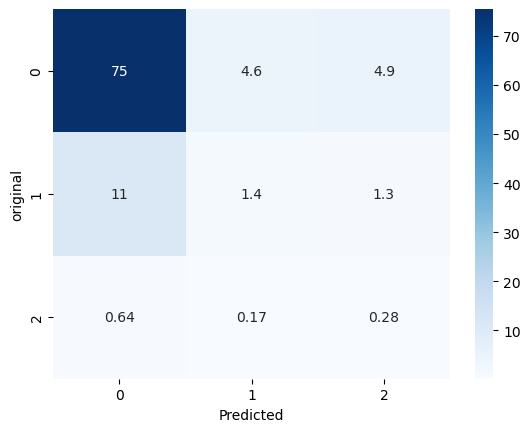

In [24]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Load the dataset
df= pd.read_csv('clean_2014.csv',index_col=0)

# Split the data into features and target
X = df.drop(['accident_severity_encoding','accident_index'], axis=1)
y = df['accident_severity_encoding']

# Split the data into training, cross validation and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

# Define the gaussian model
model = GaussianNB()

# Define the parameter grid for GridSearchCV
param_grid = {
    'var_smoothing': np.logspace(0,-12, num=200)
}

# pca = PCA(n_components=0.99)
# pca.fit(X)
# X_cv = pca.transform(X_cv)
# X_test = pca.transform(X_test)
# X_train = pca.transform(X_train)

# scores=["accuracy","precision_macro","recall_macro","f1_macro"]

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid,scoring="f1_macro",verbose=1,return_train_score=True,refit=True)

# Fit the GridSearchCV object on the cross validation data
grid_search.fit(X_cv, y_cv)

plt.plot(grid_search.cv_results_['mean_test_score'], label='Mean Test Score')
plt.plot(grid_search.cv_results_['mean_train_score'], label='Mean Train Score')
plt.legend()
plt.show()

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

print(best_model)

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# # Transform the testing data using PCA
# X_test_pca = pca.transform(X_test)

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

result = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Classification Report:",)
print (class_report)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

# #create confusion matrix
cm = confusion_matrix(y_test,y_pred,normalize='all')
sns.heatmap(cm*100,cmap='Blues',annot=True)
plt.xlabel('Predicted')
plt.ylabel('original')
plt.show()

# KNN

k is 1
k is 2
k is 3
k is 4
k is 5
k is 6
k is 7
k is 8
k is 9
k is 10
k is 11
k is 12
k is 13
k is 14
k is 15
k is 16
k is 17
k is 18
k is 19
k is 20
k is 21
k is 22
k is 23
k is 24
k is 25
k is 26
k is 27
k is 28
k is 29
k is 30


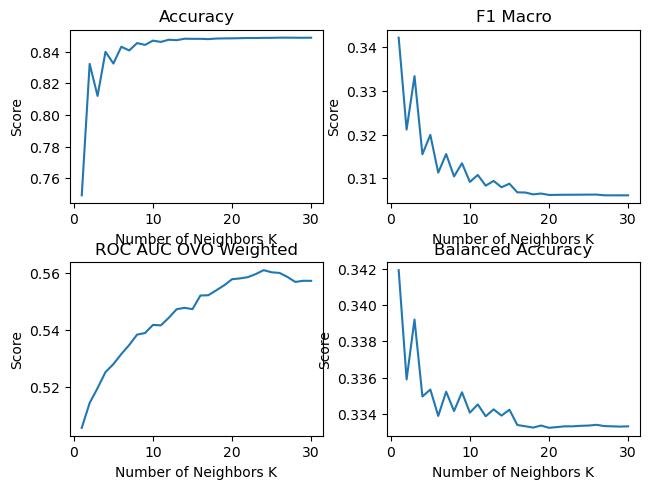

The optimal number of neighbors for accuracy is 26
The optimal number of neighbors for f1 macro is 1
The optimal number of neighbors for roc auc ovo weighted is 24
The optimal number of neighbors for balanced accuracy is 1
The smallest k that gives accuracy greater than 0.8 is 2
The overall best k that gives the best compromise between all metrics is 1


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from warnings import simplefilter

# Load the dataset
df= pd.read_csv('clean_2014.csv',index_col=0)

# Split the data into features and target
X = df.drop(['accident_severity_encoding','accident_index'], axis=1)
y = df['accident_severity_encoding']

# Split the data into training, cross validation and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,shuffle=True,stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, random_state=0,shuffle=True,stratify=y_train)

# creating a list of K for KNN
neighbors = list(range(1,31))

# empty lists that will hold cv scores
cv_scores_accuracy = []
cv_scores_f1_macro = []
cv_scores_roc_auc_ovo_weighted = []
cv_scores_balanced_accuracy = []

pca = PCA(n_components=0.99)
pca.fit(X)
X_pca_cv = pca.transform(X_cv)

# suppress future warnings
simplefilter(action='ignore', category=FutureWarning)

# perform 5-fold cross validation with different scoring metrics
for k in neighbors:
    print("k is",k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores_accuracy = cross_val_score(knn, X_pca_cv, y_cv, cv=5, scoring='accuracy')
    cv_scores_accuracy.append(scores_accuracy.mean())
    scores_f1_macro = cross_val_score(knn, X_pca_cv, y_cv, cv=5, scoring='f1_macro')
    cv_scores_f1_macro.append(scores_f1_macro.mean())
    scores_roc_auc_ovo_weighted = cross_val_score(knn,X_pca_cv,y_cv,cv=5,scoring='roc_auc_ovo_weighted')
    cv_scores_roc_auc_ovo_weighted.append(scores_roc_auc_ovo_weighted.mean())
    scores_balanced_accuracy = cross_val_score(knn,X_pca_cv,y_cv,cv=5,scoring='balanced_accuracy')
    cv_scores_balanced_accuracy.append(scores_balanced_accuracy.mean())

# changing to misclassification error for accuracy only
MSE_accuracy = [1 - x for x in cv_scores_accuracy]

# plot scores vs k for different scoring metrics in separate subplots
fig, axs = plt.subplots(2, 2)
axs[0][0].plot(neighbors,cv_scores_accuracy,label='Accuracy')
axs[0][0].set_title('Accuracy')
axs[0][1].plot(neighbors,cv_scores_f1_macro,label='F1 Macro')
axs[0][1].set_title('F1 Macro')
axs[1][0].plot(neighbors,cv_scores_roc_auc_ovo_weighted,label='ROC AUC OVO Weighted')
axs[1][0].set_title('ROC AUC OVO Weighted')
axs[1][1].plot(neighbors,cv_scores_balanced_accuracy,label='Balanced Accuracy')
axs[1][1].set_title('Balanced Accuracy')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Number of Neighbors K', ylabel='Score')

plt.show()

# determining best k for each scoring metric
optimal_k_accuracy = neighbors[MSE_accuracy.index(min(MSE_accuracy))]
print(f"The optimal number of neighbors for accuracy is {optimal_k_accuracy}")
optimal_k_f1_macro = neighbors[cv_scores_f1_macro.index(max(cv_scores_f1_macro))]
print(f"The optimal number of neighbors for f1 macro is {optimal_k_f1_macro}")
optimal_k_roc_auc_ovo_weighted = neighbors[cv_scores_roc_auc_ovo_weighted.index(max(cv_scores_roc_auc_ovo_weighted))]
print(f"The optimal number of neighbors for roc auc ovo weighted is {optimal_k_roc_auc_ovo_weighted}")
optimal_k_balanced_accuracy = neighbors[cv_scores_balanced_accuracy.index(max(cv_scores_balanced_accuracy))]
print(f"The optimal number of neighbors for balanced accuracy is {optimal_k_balanced_accuracy}")

# find smallest k that gives accuracy greater than specified threshold
accuracy_threshold = 0.8
k_accuracy_threshold = next((k for k,score in zip(neighbors,cv_scores_accuracy) if score > accuracy_threshold), None)
print(f"The smallest k that gives accuracy greater than {accuracy_threshold} is {k_accuracy_threshold}")

# find overall best k that gives best compromise between all metrics
overall_best_k = max(set(neighbors), key=lambda k: min(cv_scores_accuracy[neighbors.index(k)],cv_scores_f1_macro[neighbors.index(k)],cv_scores_roc_auc_ovo_weighted[neighbors.index(k)],cv_scores_balanced_accuracy[neighbors.index(k)]))
print(f"The overall best k that gives the best compromise between all metrics is {overall_best_k}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END metric=manhattan, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.346) total time=   0.2s
[CV 2/5] END metric=manhattan, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.343) total time=   0.1s
[CV 3/5] END metric=manhattan, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.336) total time=   0.1s
[CV 4/5] END metric=manhattan, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.347) total time=   0.2s
[CV 5/5] END metric=manhattan, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.341) total time=   0.1s
[CV 1/5] END metric=manhattan, n_neighbors=1, weights=distance;, score=(train=1.000, test=0.346) total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=1, weights=distance;, score=(train=1.000, test=0.343) total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=1, weights=distance;, score=(train=1.000, test=0.336) total time=   0.0s
[CV 4/5] END me

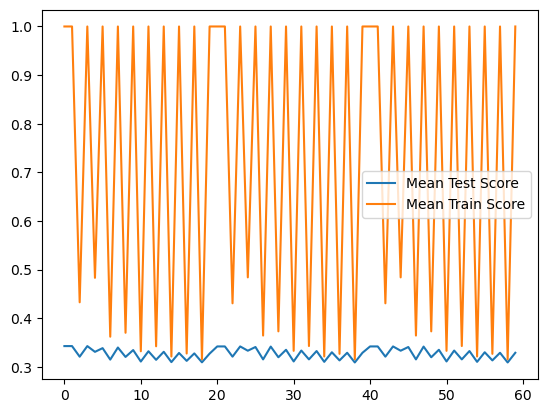

KNeighborsClassifier(metric='manhattan', n_neighbors=1)
0.5081506333442726
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86     23981
           1       0.16      0.15      0.16      3959
           2       0.01      0.01      0.01       310

    accuracy                           0.75     28250
   macro avg       0.34      0.34      0.34     28250
weighted avg       0.75      0.75      0.75     28250

Accuracy: 0.7507610619469026


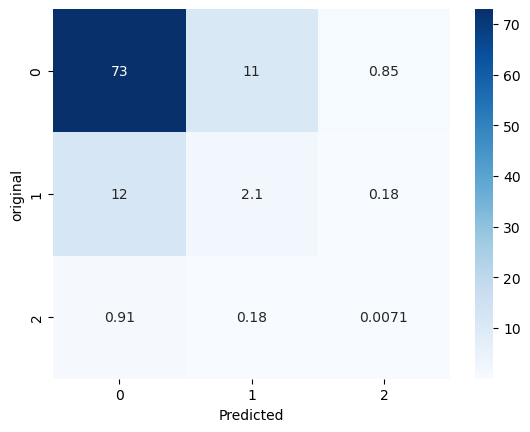

In [21]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import pandas as pd
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

# Load the dataset
df= pd.read_csv('clean_2014.csv',index_col=0)

# Split the data into features and target
X = df.drop(['accident_severity_encoding','accident_index'], axis=1)
y = df['accident_severity_encoding']

# Split the data into training, cross validation and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,shuffle=True,stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, random_state=0,shuffle=True,stratify=y_train)

pca = PCA(n_components=0.99)
pca.fit(X)
X_cv = pca.transform(X_cv)
X_test = pca.transform(X_test)
X_train = pca.transform(X_train)

# Define the kNN model
model = KNeighborsClassifier(n_neighbors=4,weights='distance')

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': range(1, 11),
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan', 'euclidean', 'minkowski'],
}
# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid,scoring="f1_macro",verbose=3,return_train_score=True,refit=True)
# Fit the GridSearchCV object on the cross validation data
grid_search.fit(X_cv, y_cv)
plt.plot(grid_search.cv_results_['mean_test_score'], label='Mean Test Score')
plt.plot(grid_search.cv_results_['mean_train_score'], label='Mean Train Score')
plt.legend()
plt.show()
# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_
print(best_model)

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

print(roc_auc_score(y_test,best_model.predict_proba(X_test),average='weighted',multi_class='ovo'))

result = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Classification Report:",)
print (class_report)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

# Create confusion matrix
cm = confusion_matrix(y_test,y_pred,normalize='all')
sns.heatmap(cm*100,cmap='Blues',annot=True)
plt.xlabel('Predicted')
plt.ylabel('original')
plt.show()


## same parameters without pca

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     23981
           1       0.17      0.17      0.17      3959
           2       0.00      0.00      0.00       310

    accuracy                           0.75     28250
   macro avg       0.34      0.34      0.34     28250
weighted avg       0.75      0.75      0.75     28250

Accuracy: 0.7485309734513275


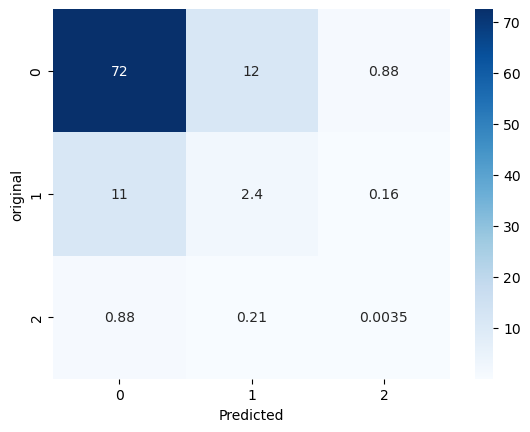

In [26]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import pandas as pd
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

# Load the dataset
df= pd.read_csv('clean_2014.csv',index_col=0)

# Split the data into features and target
X = df.drop(['accident_severity_encoding','accident_index'], axis=1)
y = df['accident_severity_encoding']

# Split the data into training, cross validation and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,shuffle=True,stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, random_state=0,shuffle=True,stratify=y_train)

# pca = PCA(n_components=0.99)
# pca.fit(X)
# X_cv = pca.transform(X_cv)
# X_test = pca.transform(X_test)
# X_train = pca.transform(X_train)

# Define the kNN model
best_model = KNeighborsClassifier(n_neighbors=1,metric='manhattan')

# # Define the parameter grid for GridSearchCV
# param_grid = {
#     'n_neighbors': range(1, 11),
#     'weights': ['uniform', 'distance'],
#     'metric': ['manhattan', 'euclidean', 'minkowski'],
# }
# # Create the GridSearchCV object
# grid_search = GridSearchCV(model, param_grid,scoring="f1_macro",verbose=3,return_train_score=True,refit=True)
# # Fit the GridSearchCV object on the cross validation data
# grid_search.fit(X_cv, y_cv)
# plt.plot(grid_search.cv_results_['mean_test_score'], label='Mean Test Score')
# plt.plot(grid_search.cv_results_['mean_train_score'], label='Mean Train Score')
# plt.legend()
# plt.show()
# # Get the best model from GridSearchCV
# best_model = grid_search.best_estimator_
# print(best_model)

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

result = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Classification Report:",)
print (class_report)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

# Create confusion matrix
cm = confusion_matrix(y_test,y_pred,normalize='all')
sns.heatmap(cm*100,cmap='Blues',annot=True)
plt.xlabel('Predicted')
plt.ylabel('original')
plt.show()


KNN has a f1 macro worse than knn so naive bayes is better than KNN

# logistic regression

In [39]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Load the dataset
df= pd.read_csv('clean_2014.csv',index_col=0)
# Split the data into features and target
X = df.drop(['accident_severity_encoding','accident_index'], axis=1)
y = df['accident_severity_encoding']
# Split the data into training, cross validation and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#calculate weights
weights=y_train.value_counts()
w0 = len(y_train)/ (3*weights[0])
w1 = len(y_train)/ (3*weights[1])
w2 = len(y_train)/ (3*weights[2])
weights= {0:w0,1:w1,2:w2}
weights

{0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     23986
           1       0.27      0.02      0.03      3955
           2       0.06      0.26      0.09       309

    accuracy                           0.81     28250
   macro avg       0.39      0.41      0.34     28250
weighted avg       0.77      0.81      0.77     28250

Accuracy: 0.8126371681415929


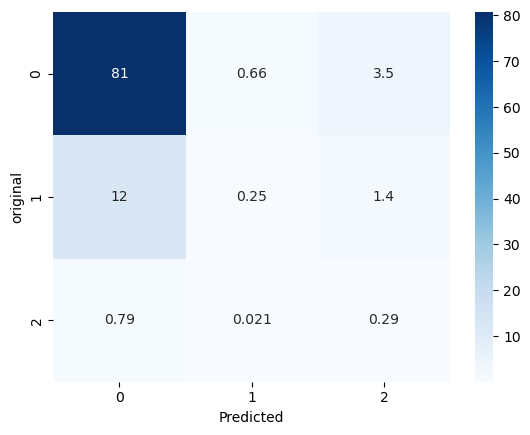

In [12]:
# define models and parameters
model = LogisticRegression(solver='liblinear', multi_class='ovr',class_weight='balanced',C=1,max_iter=1000)
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalty = ['l2']
# c_values = [100, 10, 1.0, 0.1, 0.01]
# # define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,verbose=3, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# # summarize results
# Make predictions on the testing data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

result = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Classification Report:",)
print (class_report)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

# Create confusion matrix
cm = confusion_matrix(y_test,y_pred,normalize='all')
sns.heatmap(cm*100,cmap='Blues',annot=True)
plt.xlabel('Predicted')
plt.ylabel('original')
plt.show()


logistic regression here similar to naive bayes but with tuning it can be better

Fitting 15 folds for each of 21 candidates, totalling 315 fits
[CV 1/15] END C=100, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.241 total time=   1.0s
[CV 2/15] END C=100, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.240 total time=   0.9s
[CV 3/15] END C=100, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.223 total time=   0.8s
[CV 4/15] END C=100, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.234 total time=   1.0s
[CV 5/15] END C=100, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.200 total time=   1.0s
[CV 6/15] END C=1

c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 13/15] END C=100, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.198 total time=   0.9s
[CV 14/15] END C=100, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.227 total time=   0.9s
[CV 15/15] END C=100, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.210 total time=   0.8s
[CV 1/15] END C=100, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.241 total time=   0.4s
[CV 2/15] END C=100, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.240 total time=   0.5s
[CV 3/15] END C=100, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 3

c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/15] END C=10, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.241 total time=   0.9s


c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/15] END C=10, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.240 total time=   0.8s
[CV 3/15] END C=10, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.223 total time=   0.8s
[CV 4/15] END C=10, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.234 total time=   0.8s
[CV 5/15] END C=10, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.200 total time=   0.9s
[CV 6/15] END C=10, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.240 total time=   1.0s


c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 7/15] END C=10, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.217 total time=   1.0s
[CV 8/15] END C=10, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.194 total time=   1.0s
[CV 9/15] END C=10, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.235 total time=   0.9s


c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 10/15] END C=10, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.244 total time=   0.8s
[CV 11/15] END C=10, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.254 total time=   0.9s
[CV 12/15] END C=10, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.249 total time=   0.8s


c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 13/15] END C=10, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.198 total time=   0.9s
[CV 14/15] END C=10, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.227 total time=   0.9s
[CV 15/15] END C=10, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.210 total time=   0.9s
[CV 1/15] END C=10, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.241 total time=   0.4s
[CV 2/15] END C=10, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.240 total time=   0.5s
[CV 3/15] END C=10, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.3263

c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/15] END C=1.0, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.241 total time=   0.9s
[CV 2/15] END C=1.0, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.240 total time=   0.9s
[CV 3/15] END C=1.0, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.223 total time=   1.1s
[CV 4/15] END C=1.0, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.234 total time=   0.8s
[CV 5/15] END C=1.0, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.200 total time=   0.9s
[CV 6/15] END C=1.0, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585,

c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 13/15] END C=1.0, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.198 total time=   1.1s
[CV 14/15] END C=1.0, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.227 total time=   0.9s
[CV 15/15] END C=1.0, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.210 total time=   0.8s
[CV 1/15] END C=1.0, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.241 total time=   0.4s
[CV 2/15] END C=1.0, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.240 total time=   0.6s
[CV 3/15] END C=1.0, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 3

c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 13/15] END C=0.1, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.198 total time=   0.7s
[CV 14/15] END C=0.1, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.227 total time=   1.6s
[CV 15/15] END C=0.1, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.210 total time=   1.7s
[CV 1/15] END C=0.1, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.241 total time=   1.1s
[CV 2/15] END C=0.1, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.240 total time=   0.7s
[CV 3/15] END C=0.1, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 3

c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/15] END C=0.01, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.241 total time=   1.7s


c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/15] END C=0.01, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.240 total time=   1.0s
[CV 3/15] END C=0.01, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.223 total time=   0.9s
[CV 4/15] END C=0.01, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.234 total time=   0.8s
[CV 5/15] END C=0.01, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.200 total time=   0.9s
[CV 6/15] END C=0.01, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.240 total time=   0.9s
[CV 7/15] END C=0.01, class_weight={0: 0.3926867326264722, 1: 2.37831239081

c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 8/15] END C=0.01, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.194 total time=   1.4s
[CV 9/15] END C=0.01, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.235 total time=   0.9s


c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 10/15] END C=0.01, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.244 total time=   0.9s
[CV 11/15] END C=0.01, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.254 total time=   1.0s
[CV 12/15] END C=0.01, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.249 total time=   0.7s


c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 13/15] END C=0.01, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.198 total time=   0.8s


c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 14/15] END C=0.01, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.227 total time=   0.8s
[CV 15/15] END C=0.01, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.210 total time=   1.1s
[CV 1/15] END C=0.01, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.241 total time=   0.5s
[CV 2/15] END C=0.01, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.240 total time=   0.4s
[CV 3/15] END C=0.01, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.223 total time=   0.4s
[CV 4/15] END C=0.01, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 

c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/15] END C=0.001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.241 total time=   0.9s


c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/15] END C=0.001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.240 total time=   0.9s
[CV 3/15] END C=0.001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.223 total time=   0.8s
[CV 4/15] END C=0.001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.234 total time=   0.8s
[CV 5/15] END C=0.001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.200 total time=   0.8s
[CV 6/15] END C=0.001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.239 total time=   0.9s
[CV 7/15] END C=0.001, class_weight={0: 0.3926867326264722, 1: 2.37831

c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 10/15] END C=0.001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.244 total time=   1.4s
[CV 11/15] END C=0.001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.254 total time=   0.8s
[CV 12/15] END C=0.001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.249 total time=   0.7s


c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 13/15] END C=0.001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.198 total time=   0.9s


c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 14/15] END C=0.001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.227 total time=   0.9s
[CV 15/15] END C=0.001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.210 total time=   1.0s
[CV 1/15] END C=0.001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.241 total time=   0.5s
[CV 2/15] END C=0.001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.240 total time=   0.5s
[CV 3/15] END C=0.001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.223 total time=   0.6s
[CV 4/15] END C=0.001, class_weight={0: 0.3926867326264722, 1: 2.378312390814758

c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/15] END C=0.0001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.241 total time=   1.2s
[CV 2/15] END C=0.0001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.240 total time=   1.1s
[CV 3/15] END C=0.0001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.222 total time=   1.2s
[CV 4/15] END C=0.0001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.234 total time=   0.8s
[CV 5/15] END C=0.0001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.201 total time=   0.8s
[CV 6/15] END C=0.0001, class_weight={0: 0.3926867326264722, 1: 2

c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 14/15] END C=0.0001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.226 total time=   1.7s


c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 15/15] END C=0.0001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.209 total time=   0.9s
[CV 1/15] END C=0.0001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.241 total time=   0.4s
[CV 2/15] END C=0.0001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.240 total time=   0.5s
[CV 3/15] END C=0.0001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.222 total time=   0.5s
[CV 4/15] END C=0.0001, class_weight={0: 0.3926867326264722, 1: 2.3783123908147585, 2: 30.326355340848096}, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.234 total time=   0.4s
[CV 5/15] END C=0.0001, class_weight={0: 0.3926867326264722, 1: 2.37831239081475

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     23981
           1       0.00      0.00      0.00      3959
           2       0.00      0.00      0.00       310

    accuracy                           0.85     28250
   macro avg       0.28      0.33      0.31     28250
weighted avg       0.72      0.85      0.78     28250

Accuracy: 0.8488849557522123


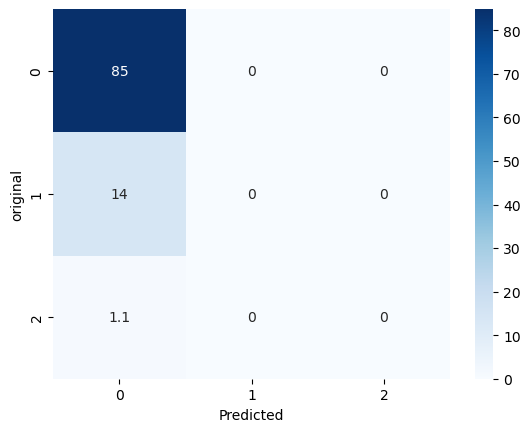

In [44]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

# Load the dataset
df= pd.read_csv('clean_2014.csv',index_col=0)
# Split the data into features and target
X = df.drop(['accident_severity_encoding','accident_index'], axis=1)
y = df['accident_severity_encoding']

# Split the data into training, cross validation and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,shuffle=True,stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, random_state=0,shuffle=True,stratify=y_train)

pca = PCA(n_components=0.99)
pca.fit(X)
X_cv = pca.transform(X_cv)
X_test = pca.transform(X_test)
X_train = pca.transform(X_train)

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01,0.001,0.0001]
# define grid search
grid = dict(solver=solvers, penalty=penalty, C=c_values,multi_class=['ovr'], class_weight=[weights])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid,verbose=3, cv=cv, scoring='f1_macro')
grid_result = grid_search.fit(X_train, y_train)
# summarize results
# Make predictions on the testing data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

result = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Classification Report:",)
print (class_report)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

# Create confusion matrix
cm = confusion_matrix(y_test,y_pred,normalize='all')
sns.heatmap(cm*100,cmap='Blues',annot=True)
plt.xlabel('Predicted')
plt.ylabel('original')
plt.show()
